Mean Squared Error: 599931015.4751563
R-squared: 0.3777401409812583


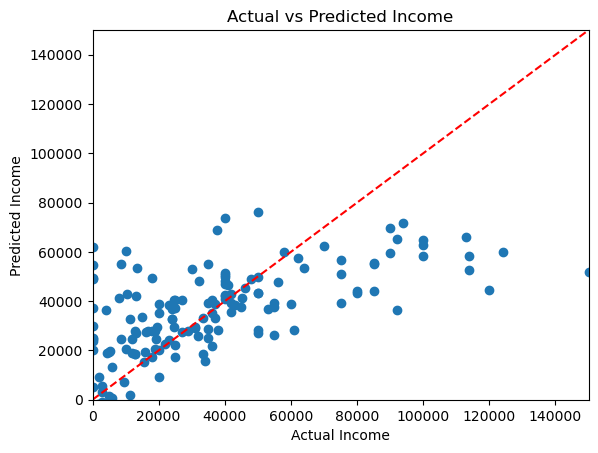

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset, skip the first row as it contains headers within the data
data = pd.read_csv('acs.csv', skiprows=[1])

# Data Exploration and Preprocessing
# Convert certain variables to appropriate data types

# Convert age to numeric (assuming it's an integer)
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # 'coerce' to handle non-numeric values

# Convert hrs_work to numeric (assuming it's an integer)
data['hrs_work'] = pd.to_numeric(data['hrs_work'], errors='coerce')  # 'coerce' to handle non-numeric values

# Replace 'employed' with a numeric value
data['employment'] = data['employment'].replace('employed', 1)

# Convert 'employment' to numeric
data['employment'] = pd.to_numeric(data['employment'], errors='coerce')  # 'coerce' to handle non-numeric values

# Handle categorical variables: race, gender, citizen, lang, married, edu, disability, birth_qrtr
categorical_cols = ['race', 'gender', 'citizen', 'lang', 'married', 'edu', 'disability', 'birth_qrtr']

# Apply one-hot encoding to categorical variables
for col in categorical_cols:
    # Fill missing values with a placeholder (e.g., 'unknown')
    data[col].fillna('unknown', inplace=True)
    
    # One-hot encode the categorical column
    encoded_cols = pd.get_dummies(data[col], prefix=col)
    
    # Drop the original categorical column from the dataframe
    data = data.drop(columns=[col])
    
    # Add the encoded columns to the dataframe
    data = pd.concat([data, encoded_cols], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Filter out income values greater than 150,000
data = data[data['income'] <= 150000]

# Prepare the data for regression
X = data.drop(columns=['income'])  # Features (independent variables)
y = data['income']  # Target (dependent variable)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Plot the results
plt.scatter(y_test, predictions)
plt.xlim(0, 150000)  # Limit x-axis to income values <= 150,000
plt.ylim(0, 150000)  # Limit y-axis to predicted income values <= 150,000
plt.plot([0, 150000], [0, 150000], '--', color='red')  # Diagonal line
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income')
plt.show()